# Импорты

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import control 
import sympy
import os
import scipy

import cvxpy 
import array_to_latex as a2l

In [2]:
sympy.init_printing()
p = sympy.Symbol("p")
s = sympy.Symbol("s")
t = sympy.Symbol("t")
w = sympy.Symbol("w")
I = sympy.I

In [3]:
np.set_printoptions(precision=2)

In [4]:
def get_t(end_t = 10, dt=0.001, start_t = 0):
    return np.linspace(start_t, end_t, int(end_t / dt))

# Задание 1

In [5]:
def get_controllability_matrix(A, B):
    ctrb_m = np.hstack((B, *[(np.linalg.matrix_power(A, i)) @ B for i in range(1, A.shape[0])]))
    assert np.allclose(control.ctrb(A, B), ctrb_m), 'Smth wrong'
    return ctrb_m

def get_observability_matrix(A, C):
    obsv_m = np.vstack((C, *[C @ np.linalg.matrix_power(A, i) for i in range(1, A.shape[0])]))
    assert np.allclose(control.obsv(A, C), obsv_m), 'Smth wrong'
    return obsv_m

def check_controllability(A, B):
    U = get_controllability_matrix(A, B)
    print(f'RankU = {np.linalg.matrix_rank(U)}')
    return np.linalg.matrix_rank(U) == A.shape[0]
        
def check_controllability_eigens(A, B):
    eig_vals = np.linalg.eigvals(A)
    print(f'Eigen values of A:')
    for val in eig_vals:
        print(f"   {np.array([val])}: {'controllable' if np.linalg.matrix_rank(np.hstack(((A - val * np.eye(A.shape[0])), B))) == A.shape[0] else 'not controllable'}")

def check_observability(C, A):
    V = get_observability_matrix(A, C)
    print(f'RankV = {np.linalg.matrix_rank(V)}')
    return np.linalg.matrix_rank(V) == A.shape[0]

def check_observability_eigens(C, A):
    eig_vals = np.linalg.eigvals(A)
    print(f'Eigen values of A:')
    for val in eig_vals:
        print(f"   {np.array([val])}: {'observable' if np.linalg.matrix_rank(np.vstack(((A - val * np.eye(A.shape[0])), C))) == A.shape[0] else 'not observable'}")

In [6]:
A = np.array([
    [-6, 19, 10, -13],
    [0, -9, 0, 6],
    [-4, 8, 6, -7],
    [0, -15, 0, 9]
])

B = np.array([[4, 0], 
                    [2, 0], 
                    [6, 0], 
                    [4, 0]])

C= np.array([[-3, 9, 3, -6], 
                    [0, -2, 0, 1]])

D= np.array([[0, 0], 
                    [0, 2]])
a2l.to_ltx(C)

\begin{bmatrix}
 -3.00 &  9.00 &  3.00 & -6.00\\
  0.00 & -2.00 &  0.00 &  1.00
\end{bmatrix}


In [20]:
task1_x0 = np.ones(A.shape[0]).reshape(-1, 1)
q_values = np.array([1.0, 10.0, 1.0])
r_values = np.array([1.0, 1.0, 10.0])
dt = 0.001
ts = get_t(15, dt=dt)

======= Q = 1.0; R = 1.0 ===========
K = array([[-1.2 , 10.88,  3.57, -6.8 ],
       [ 0.  ,  0.  ,  0.  ,  0.  ]])
\[Q = 1.0; R = 1.0; K_0 = \begin{bmatrix}
 -1.20 &  10.88 &  3.57 & -6.80\\
  0.00 &  0.00 &  0.00 &  0.00
\end{bmatrix}\]
\[spec(A-BK_0) = \begin{bmatrix}
 -0.29 + 2.68j & -0.29 + -2.68j & -3.90 + 0.00j & -6.70 + 0.00j
\end{bmatrix}\]
P = [[  2.76 -18.96  -4.19  12.71]
 [-18.96 142.76  31.41 -96.83]
 [ -4.19  31.41   7.97 -22.57]
 [ 12.71 -96.83 -22.57  67.86]]
P = \begin{bmatrix}
  2.76 & -18.96 & -4.19 &  12.71\\
 -18.96 &  142.76 &  31.41 & -96.83\\
 -4.19 &  31.41 &  7.97 & -22.57\\
  12.71 & -96.83 & -22.57 &  67.86
\end{bmatrix}
eig(A+BK) = [-0.29+2.68j -0.29-2.68j -3.9 +0.j   -6.7 +0.j  ]
J_theory = [[24.5]]
J_real = 24.518946805070666
======= Q = 10.0; R = 1.0 ===========
K = array([[ -2.5 ,  32.4 ,   9.53, -20.47],
       [  0.  ,   0.  ,   0.  ,   0.  ]])
\[Q = 10.0; R = 1.0; K_1 = \begin{bmatrix}
 -2.50 &  32.40 &  9.53 & -20.47\\
  0.00 &  0.00 &  0.00 &  0.0

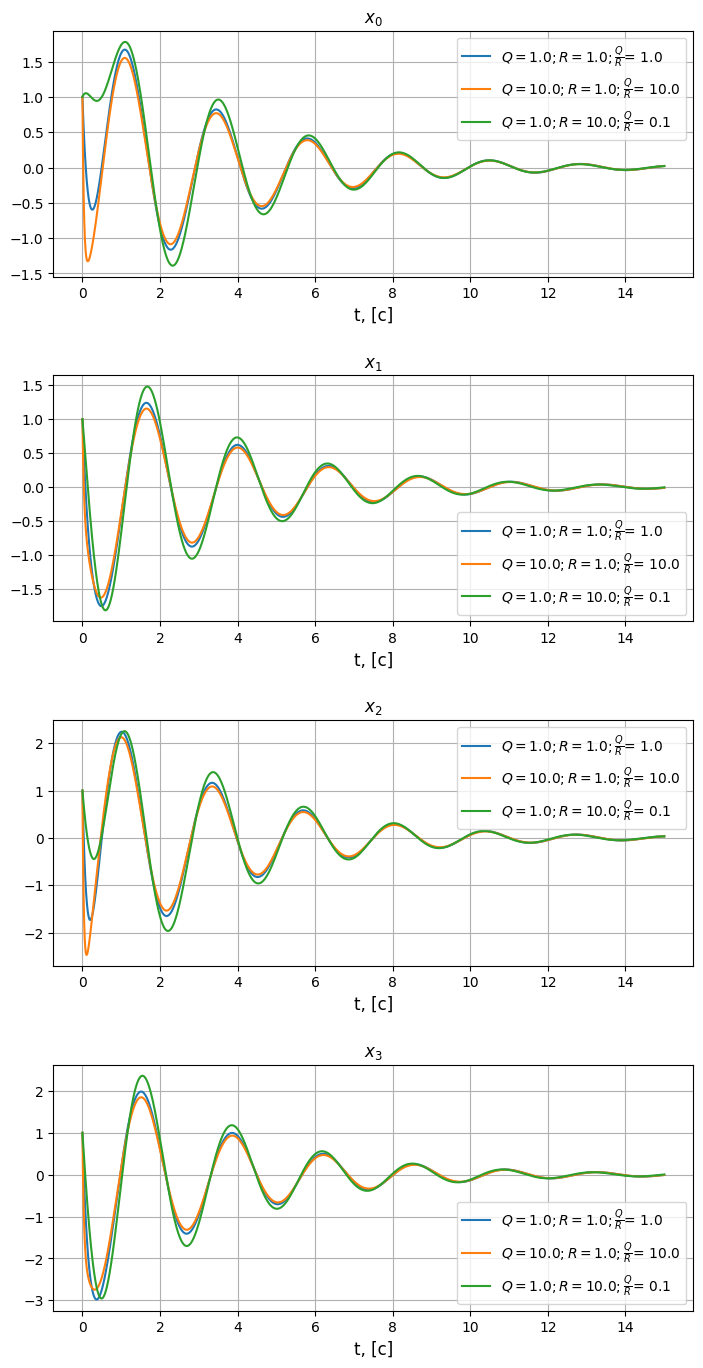

In [124]:
task1_us = []
fig, axs = plt.subplots(4, figsize=(8, 16))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4,hspace=0.4)

for indx in range(q_values.shape[0]):
    print(f'======= Q = {q_values[indx]}; R = {r_values[indx]} ===========')
    Q = np.diag(np.ones((A.shape[0]))) * q_values[indx]
    R = np.diag(np.ones((B.shape[1]))) * r_values[indx]
    K, S, E = control.lqr(A, B, Q, R)
    print(f'{K = }')
    print(f'\[Q = {q_values[indx]}; R = {r_values[indx]}; K_{indx} = {a2l.to_ltx(K, print_out=False)}\]')
    print(f'\[spec(A-BK_{indx}) = {a2l.to_ltx(E, print_out=False)}\]')
    print(f'P = {S}')
    print(f"P = {a2l.to_ltx(S, print_out=False)}")
    print(f'eig(A+BK) = {E}')
    print(f"J_theory = {task1_x0.T @ S @ task1_x0}")
    
    ss = control.ss(A - B@K, A*0, A*0, A*0)
    res = control.forced_response(ss, X0=task1_x0, T=ts)
    
    xs = res.states
    us =  K @ xs
    print(f"J_real = {dt * np.sum(np.diagonal(xs.T @ Q @ xs + us.T @ R @ us))}")
    task1_us.append((us, f"$Q = {q_values[indx]}; R = {r_values[indx]};$" "$\\frac{Q}{R}$" f"= {q_values[indx] / r_values[indx]}"))
    

    
    for i, state in enumerate(res.states):
        axs[i].plot(ts, state, label=f"$Q = {q_values[indx]}; R = {r_values[indx]};$" "$\\frac{Q}{R}$" f"= {q_values[indx] / r_values[indx]}") 

for i in range(4):
    axs[i].set_xlabel(f"t, [c]", fontsize=12)
    axs[i].set_title(f"$x_{i}$", fontsize=12)
    axs[i].grid(True)
    axs[i].legend()

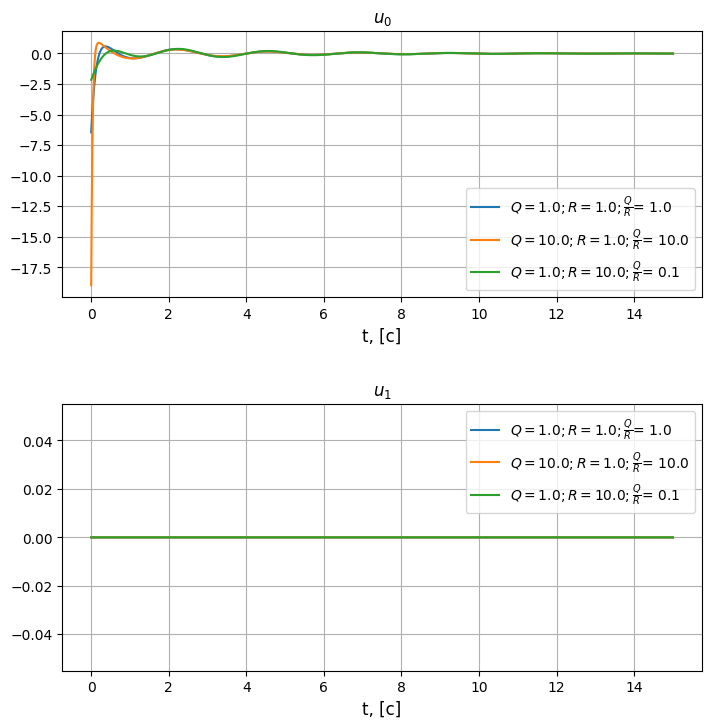

In [32]:
fig, axs = plt.subplots(2, figsize=(8, 8))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4,hspace=0.4)

for u, l in task1_us:
    axs[0].plot(ts, u[0], label=l)
    axs[1].plot(ts, u[1], label=l)
    
for i in range(2):
    axs[i].set_xlabel(f"t, [c]", fontsize=12)
    axs[i].set_title(f"$u_{i}$", fontsize=12)
    axs[i].grid(True)
    axs[i].legend()

# Задание 2

In [69]:
alpha = 2.0

In [70]:
def get_K_from_lmi(A, B, alpha):
    P = cvxpy.Variable(A.shape, PSD=True)
    Y = cvxpy.Variable((B.shape[1], B.shape[0]))
    lyapunov_lmi = P @ A.T + A @ P + 2 * alpha * P + Y.T @ B.T + B @ Y
    
    constraints = [P >> np.eye(4) , lyapunov_lmi << 0]
    objective = cvxpy.Minimize(0)
    
    prob = cvxpy.Problem(objective, constraints)
    try:
        print(f'Optimization error: {prob.solve()}')
        print(f'spec(P): {np.linalg.eigvals(P.value)}; P >> 0: {np.all(np.linalg.eigvals(P.value).real >= 0)}')
        print(f'spec(lmi): {np.linalg.eigvals(lyapunov_lmi.value)}; lyapunov_lmi <<= 0: {np.all(np.linalg.eigvals(lyapunov_lmi.value).real <= 0)}')
        # print(P.value)
    except Exception:
        print(':(')
        return 0, False
    
    
    return Y.value @ np.linalg.pinv(P.value), True

In [71]:
K = get_K_from_lmi(A, B, alpha)[0]
lmi_ss = control.ss(A + B@K, A*0, A*0, A*0)
print(f'eig(A+BK) = {np.linalg.eigvals(A + B@K)}')
a2l.to_ltx(np.linalg.eigvals(A + B@K))
lmi_res = control.forced_response(lmi_ss, X0=task1_x0, T=ts)
xs = lmi_res.states
lmi_us = - K @ xs
print(f"J_lmi = {dt * np.sum(np.diagonal(xs.T @ Q @ xs + lmi_us.T @ R @ lmi_us))}")

Optimization error: 0.0
spec(P): [3.79e+07 2.04e+07 2.21e+05 8.77e+02]; P >> 0: True
spec(lmi): [-6.58e+06 -5.02e+06 -1.95e+03 -3.04e+01]; lyapunov_lmi <<= 0: True
eig(A+BK) = [-2.63+5.19j -2.63-5.19j -2.19+0.83j -2.19-0.83j]
\begin{bmatrix}
 -2.63 + 5.19j & -2.63 + -5.19j & -2.19 + 0.83j & -2.19 + -0.83j
\end{bmatrix}
J_lmi = 992.3388466947207


In [72]:
q_value = q_values[1]
r_value = r_values[1]
Q = np.diag(np.ones((A.shape[0]))) * q_value
R = np.diag(np.ones((B.shape[1]))) * r_value

K, S, E = control.lqr(A, B, Q, R)
print(f'eig(A+BK) = {E}')
print(f"J_theory = {task1_x0.T @ S @ task1_x0}")

lqr_ss = control.ss(A - B@K, A*0, A*0, A*0)
lqr_res = control.forced_response(lqr_ss, X0=task1_x0, T=ts)

xs = lqr_res.states
lqr_us = - K @ xs
print(f"J_lqr = {dt * np.sum(np.diagonal(xs.T @ Q @ xs + lqr_us.T @ R @ lqr_us))}")

eig(A+BK) = [-26.43+0.j    -0.29+2.67j  -0.29-2.67j  -3.08+0.j  ]
J_theory = [[216.77]]
J_lqr = 216.9233919315159


In [73]:
a2l.to_ltx(E)

\begin{bmatrix}
 -26.43 + 0.00j & -0.29 + 2.67j & -0.29 + -2.67j & -3.08 + 0.00j
\end{bmatrix}


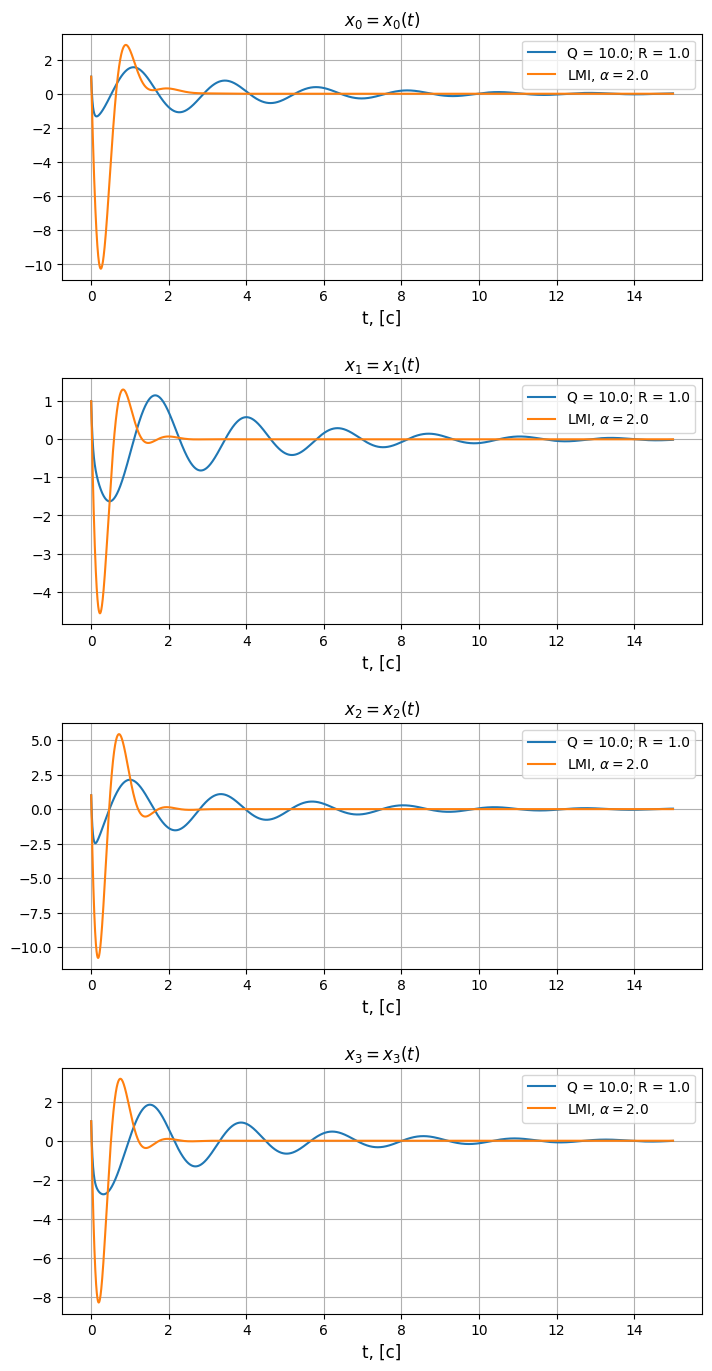

In [74]:
fig, axs = plt.subplots(4, figsize=(8, 16))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4,hspace=0.4)

for i, state in enumerate(lqr_res.states):
        axs[i].plot(ts, state, label=f'Q = {q_value}; R = {r_value}') 
for i, state in enumerate(lmi_res.states):
        axs[i].plot(ts, state, label=f'LMI, $\\alpha = {alpha}$') 

for i in range(4):
    axs[i].set_xlabel(f"t, [c]", fontsize=12)
    axs[i].set_title(f"$x_{i} = x_{i}(t)$", fontsize=12)
    axs[i].grid(True)
    axs[i].legend()

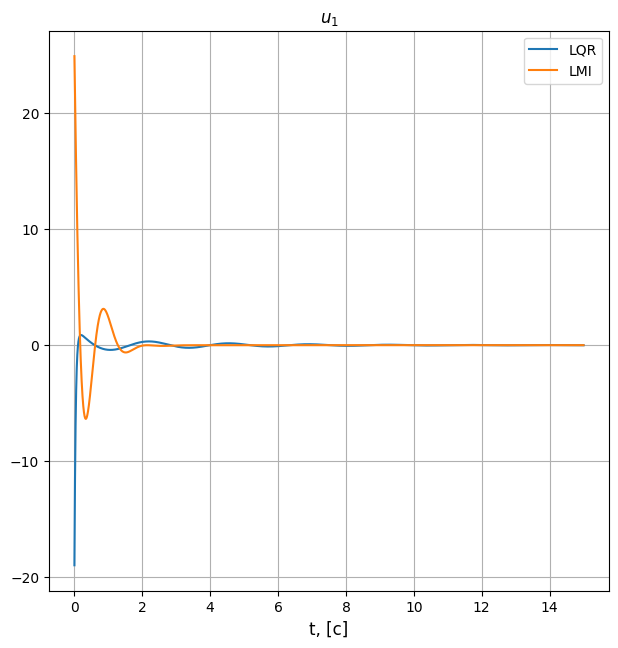

In [75]:
fig, axs = plt.subplots(1, 1, figsize=(7, 7))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4,hspace=0.4)


plt.plot(ts, lqr_us[0], label='LQR')
plt.plot(ts, lmi_us[0], label='LMI')
    
plt.xlabel(f"t, [c]", fontsize=12)
plt.title(f"$u_1$", fontsize=12)
plt.grid(True)
plt.legend()

In [130]:
def J(x, u, Q, R):
    return dt * np.sum(x.T @ Q @ x + u.T @ R @ u)

In [143]:
#Js_lqr = [J(lqr_res.states[0:4, i], np.array([lqr_us[0, i], lqr_us[1, i]]), Q, R) for i in range(lqr_res.states.shape[1])]
Js_lqr = [J(lqr_res.states[0:4, 0], np.array([lqr_us[0, 0], lqr_us[1, 0]]), Q, R)]
for i in range(1, len(ts)):
    Js_lqr.append(Js_lqr[-1] + J(lqr_res.states[0:4, i], np.array([lqr_us[0, i], lqr_us[1, i]]), Q, R))

Js_lmi = [J(lmi_res.states[0:4, 0], np.array([lqr_us[0, 0], lmi_us[1, 0]]), Q, R)]
for i in range(1, len(ts)):
    Js_lmi.append(Js_lmi[-1] + J(lmi_res.states[0:4, i], np.array([lqr_us[0, i], lmi_us[1, i]]), Q, R))

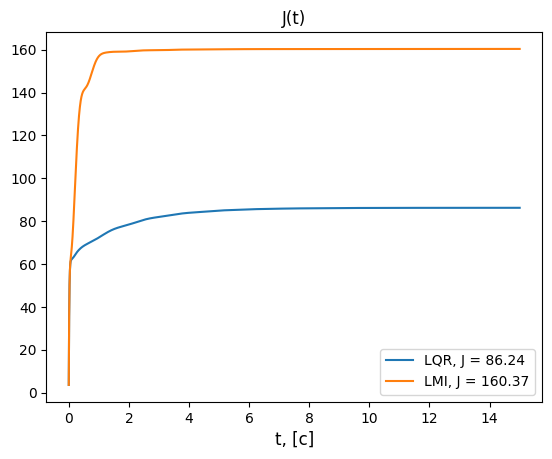

In [152]:
plt.plot(ts, Js_lqr, label=f"LQR, J = {Js_lqr[-1]:.{2}f}")
plt.plot(ts, Js_lmi, label=f"LMI, J = {Js_lmi[-1]:.{2}f}")
plt.title("J(t)")
plt.xlabel(f"t, [c]", fontsize=12)
plt.legend()

# Задание 3

# Задание 4